In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [23]:
data = pd.read_csv('less_20/data/vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


In [24]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [25]:
data.describe(include=object)

,Gender,Vehicle_Age,Vehicle_Damage
count,10000,10000,10000
unique,2,3,2
top,Male,1-2 Year,Yes
freq,5437,5263,5143


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [26]:
print("Оценка несбалансированности классов: ")
data.groupby("Response").size().to_frame()

Оценка несбалансированности классов: 


,0
Response,
0,8753
1,1247


In [27]:
### Your code is here

def numeric_categorical_columns(dataset):
    numeric_columns = dataset.select_dtypes(exclude=[np.object_]).columns.tolist()
    categorical_columns = dataset.select_dtypes(include=[np.object_]).columns.tolist()
    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = numeric_categorical_columns(data)


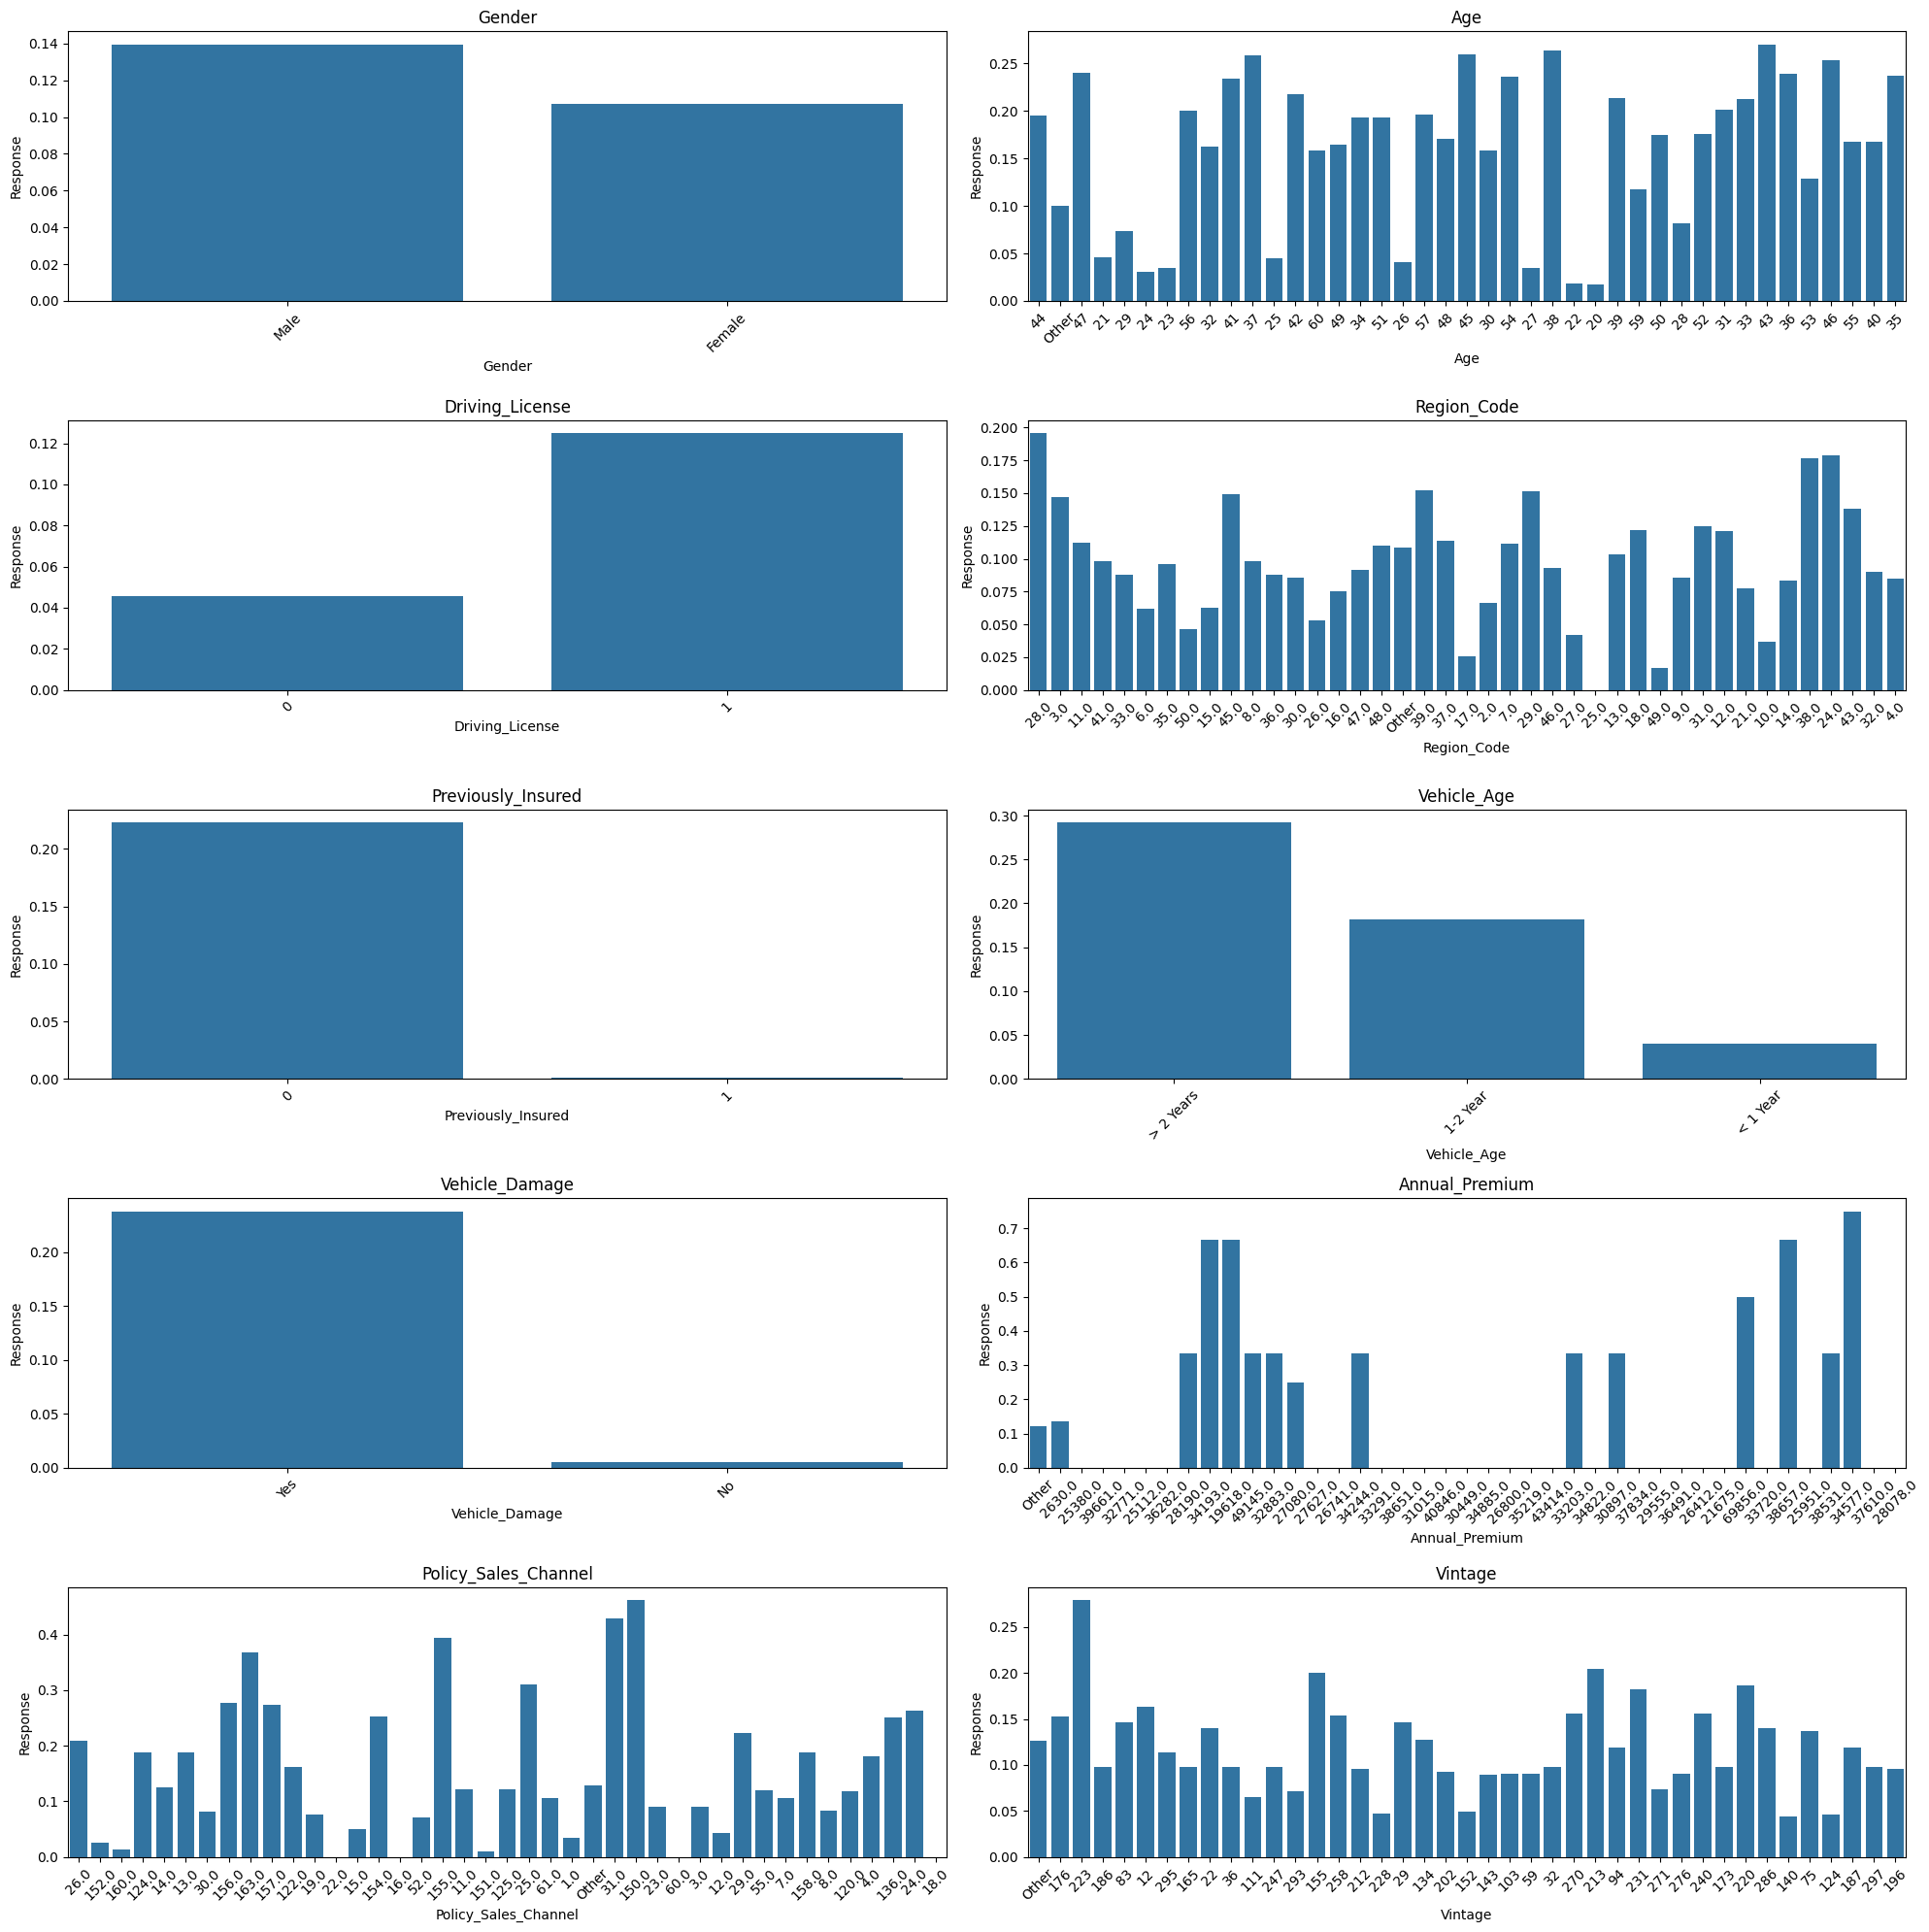

In [7]:
# Функция для ограничения количества категорий
def limit_categories(data, column, max_categories=100):
    counts = data[column].value_counts()
    if len(counts) > max_categories:
        top_categories = counts.nlargest(max_categories).index
        limited_data = data[column].apply(lambda x: x if x in top_categories else 'Other')
    else:
        limited_data = data[column]
    return limited_data

# Создание копии DataFrame, чтобы не изменять оригинальный
limited_data = data.copy()

# Применение ограничения для каждого признака
for col in numeric_columns:
    limited_data[col] = limit_categories(data, col, max_categories=40)

# Создание подграфиков для bar plot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

# Плоский список осей для итерации
axes = axes.flatten()

# Построение bar plot для каждого признака
for i, col in enumerate(data.drop(["Response"], axis=1).columns):
    sns.barplot(x=limited_data[col], y=limited_data['Response'], ax=axes[i], ci=None)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)  # Поворот меток оси X на 45 градусов

# Подстройка компоновки, чтобы избежать наложения
plt.tight_layout()
plt.show()

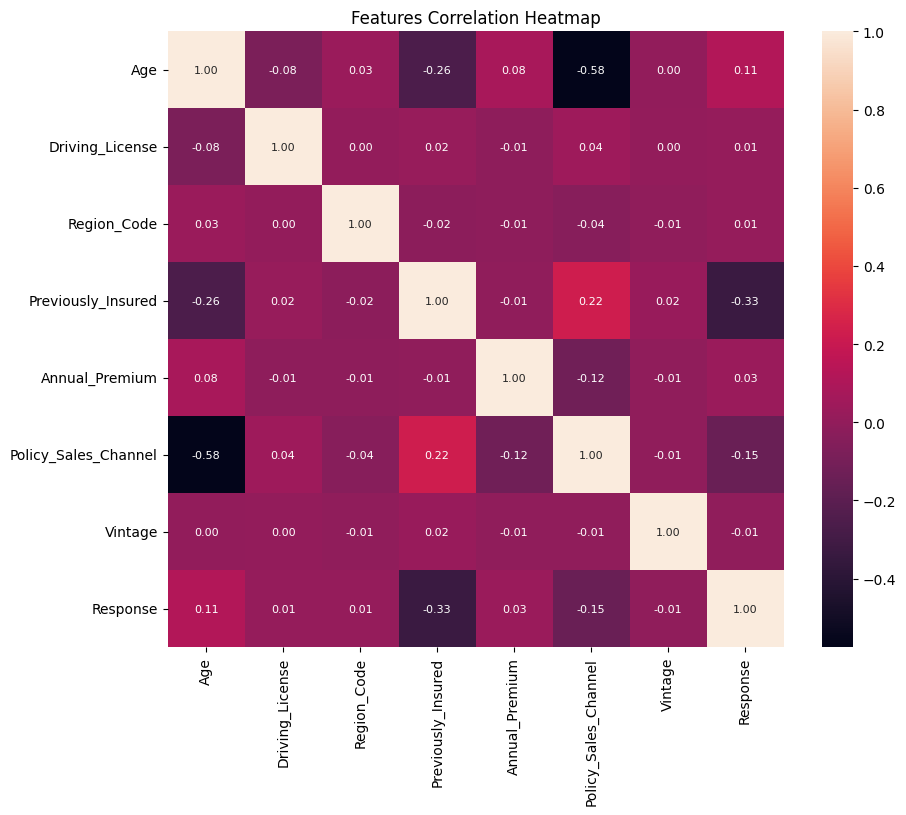

In [8]:
def plot_correlation_heatmap(df):
    cm = np.corrcoef(df[numeric_columns].values.T)
    fig = plt.figure(figsize=(10, 8))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=numeric_columns, xticklabels=numeric_columns)
    plt.title('Features Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data[numeric_columns])    

In [30]:
def process_categorical_columns_ohe(df, categorical_columns):
    for col in categorical_columns:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        one_hot.replace({False: 0, True: 1}, inplace=True)
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
    return df

data_ = process_categorical_columns_ohe(data, categorical_columns)
data_

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0,1,0,0
9996,28,1,35.0,1,23589.0,160.0,173,0,1,1,0,0
9997,27,1,15.0,0,33340.0,152.0,207,0,0,1,0,1
9998,28,1,14.0,1,25426.0,152.0,247,0,0,1,0,0


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data_.drop('Response', axis=1)
y = data_['Response']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    shuffle=True,
    test_size=0.2
)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here

gb_clf = GradientBoostingClassifier(
    learning_rate=1,
    random_state=1,
    n_estimators=100
)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(
    classification_report(
    y_test,
    y_pred
))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1770
           1       0.31      0.24      0.27       230

    accuracy                           0.85      2000
   macro avg       0.61      0.59      0.59      2000
weighted avg       0.84      0.85      0.84      2000



In [12]:
def plot_roc_curve(model, X, Y, title='Receiver Operating Characteristic (ROC) Curve'):
    """
    Строит ROC-кривую для модели и расчитывает площадь под ней.

    Параметры:
    - model: обученная модель для оценки.
    - X: массив признаков выборки.
    - Y: массив целевых значений выборки.
    """

    if hasattr(model, 'predict_proba'):
        # Если доступен метод predict_proba, используем его для получения вероятностей
        y_probas = model.predict_proba(X)[:, 1]
    else:
        # Иначе получаем отступы и применяем сигмоидную функцию для получения вероятностей
        M = model.decision_function(X)
        y_probas = 1 / (1 + np.exp(-M))

    # Получение данных ROC-кривой
    fpr, tpr, thresholds = roc_curve(Y, y_probas)

    # Построение ROC-кривой с настройками внешнего вида
    plt.figure(figsize=(8, 6))  # Размер графика
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve: {auc(fpr, tpr):.3f}")  # Цвет, ширина линии и название кривой
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
    plt.xlim([0.0, 1.0])  # Пределы оси x
    plt.ylim([0.0, 1.05])  # Пределы оси y
    plt.xlabel('False Positive Rate')  # Подпись оси x
    plt.ylabel('True Positive Rate')  # Подпись оси y
    plt.title(title)  # Название графика
    plt.grid(True, alpha=0.1, linestyle="--")  # Включение сетки
    plt.legend(loc="lower right")  # Расположение легенды

    # Закраска площади под ROC-кривой
    plt.fill_between(fpr, tpr, color='purple', alpha=0.3)

    # Отображение графика
    plt.show()

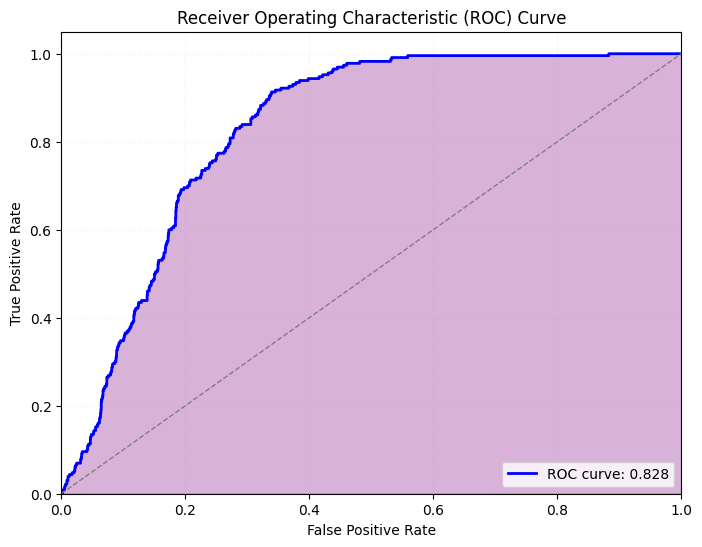

In [13]:
plot_roc_curve(gb_clf, X_test, y_test)

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

Лучший F1-score: 0.8455443439122964
Параметры: n_estimators=700, learning_rate=0.1


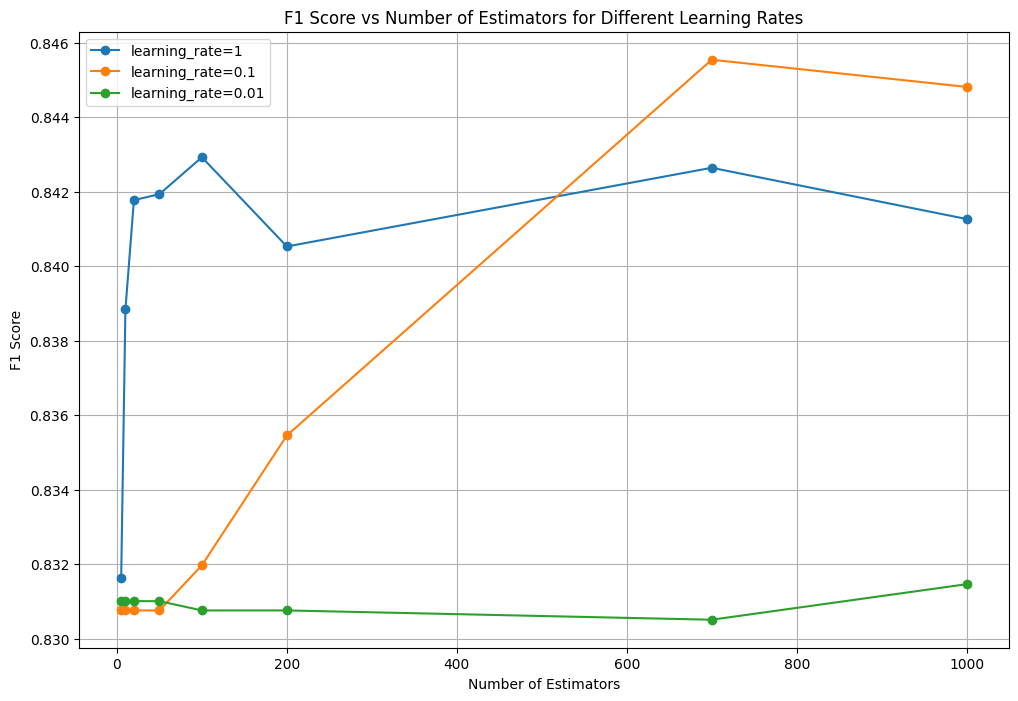

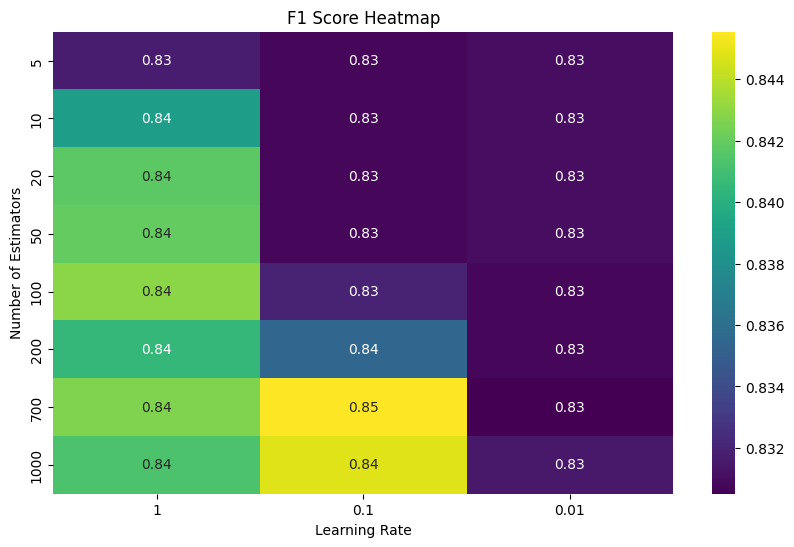

In [14]:
# Значения параметров
n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

# Матрица для хранения результатов
results_matrix = np.zeros((len(n_estimators_list), len(learning_rate_list)))

# Сбор данных F1-score
for i, n_estimators in enumerate(n_estimators_list):
    for j, learning_rate in enumerate(learning_rate_list):
        gb_clf = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate
        )
        
        gb_clf.fit(X_train, y_train)
        
        f1 = f1_score(y_test, gb_clf.predict(X_test), average='weighted')
        
        results_matrix[i, j] = f1

# Найти наилучшие параметры
best_idx = np.unravel_index(np.argmax(results_matrix, axis=None), results_matrix.shape)
best_n_estimators = n_estimators_list[best_idx[0]]
best_learning_rate = learning_rate_list[best_idx[1]]
best_f1_score = results_matrix[best_idx]

print(f'Лучший F1-score: {best_f1_score}')
print(f'Параметры: n_estimators={best_n_estimators}, learning_rate={best_learning_rate}')

# Построение кривых F1-score для разных learning_rate
plt.figure(figsize=(12, 8))
for j, learning_rate in enumerate(learning_rate_list):
    plt.plot(n_estimators_list, results_matrix[:, j], marker='o', label=f'learning_rate={learning_rate}')

plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Estimators for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Построение heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_matrix, annot=True, xticklabels=learning_rate_list, yticklabels=n_estimators_list, cmap='viridis')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('F1 Score Heatmap')
plt.show()

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [15]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here

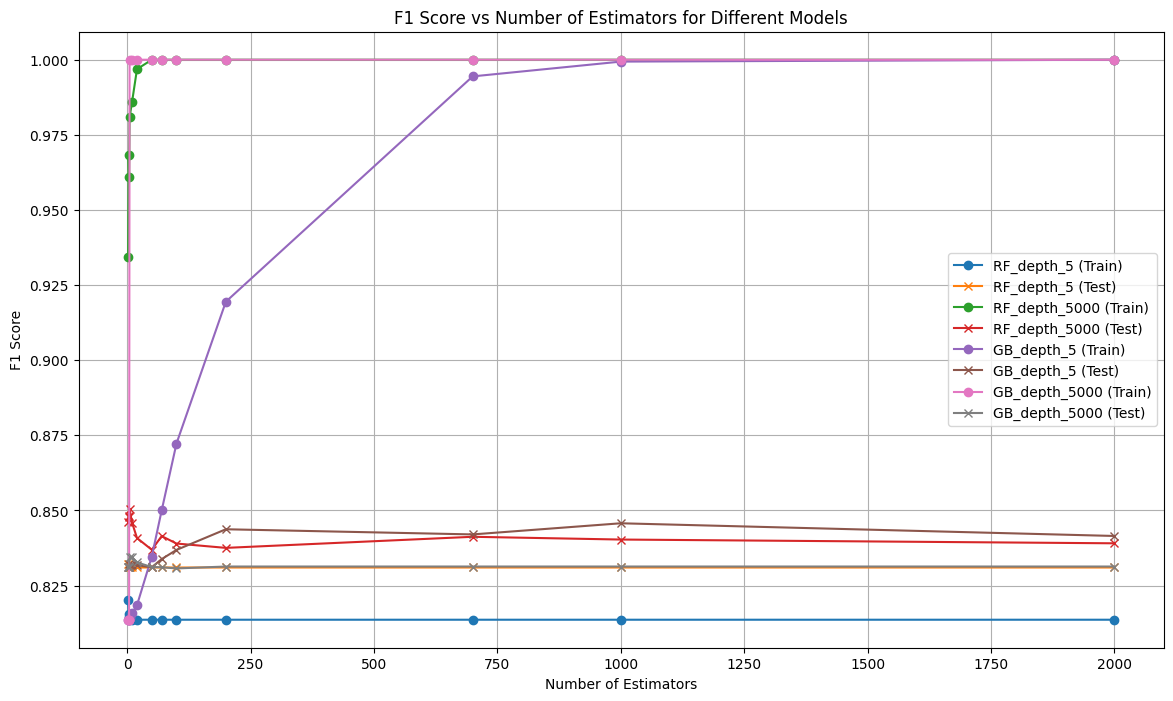

Model: RF_depth_5, Max F1-Score (Train): 0.820286801693839, Max F1-Score (Test): 0.8321428947861198
Model: RF_depth_5000, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8504898717581378
Model: GB_depth_5, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8457243433827516
Model: GB_depth_5000, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8344317875904717


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Значения параметров
n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

# Словари для хранения результатов
results_train = {}
results_test = {}

# Функция для обучения модели и сохранения результатов
def evaluate_model(model, model_name):
    results_train[model_name] = []
    results_test[model_name] = []
    for n_estimators in n_estimators_list:
        model.set_params(n_estimators=n_estimators)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        f1_train = f1_score(y_train, train_pred, average='weighted')
        f1_test = f1_score(y_test, test_pred, average='weighted')
        
        results_train[model_name].append(f1_train)
        results_test[model_name].append(f1_test)

# Создание и оценка моделей
models = {
    'RF_depth_5': RandomForestClassifier(max_depth=5, random_state=42),
    'RF_depth_5000': RandomForestClassifier(max_depth=5000, random_state=42),
    'GB_depth_5': GradientBoostingClassifier(max_depth=5, random_state=42),
    'GB_depth_5000': GradientBoostingClassifier(max_depth=5000, random_state=42)
}

for model_name, model in models.items():
    evaluate_model(model, model_name)

# Построение графиков
plt.figure(figsize=(14, 8))

for model_name in results_train:
    plt.plot(n_estimators_list, results_train[model_name], marker='o', label=f'{model_name} (Train)')
    plt.plot(n_estimators_list, results_test[model_name], marker='x', label=f'{model_name} (Test)')

plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Estimators for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
for model_name in results_train:
    max_f1_train = max(results_train[model_name])
    max_f1_test = max(results_test[model_name])
    print(f'Model: {model_name}, Max F1-Score (Train): {max_f1_train}, Max F1-Score (Test): {max_f1_test}')

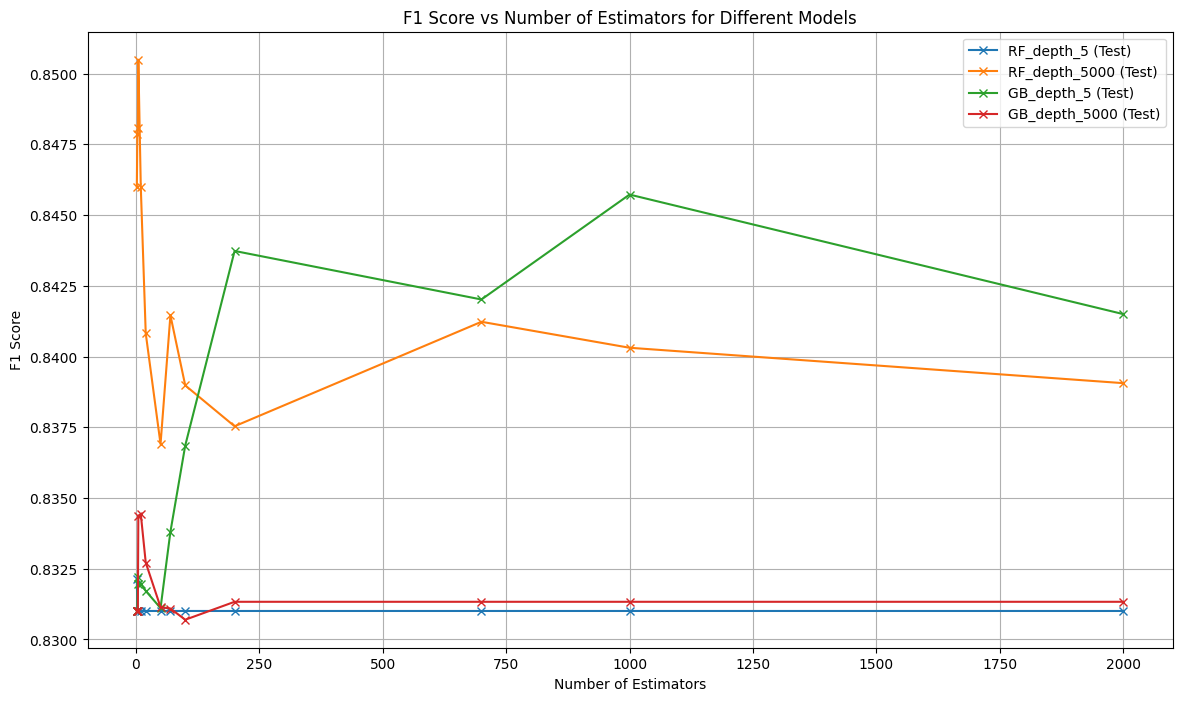

Model: RF_depth_5, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8321428947861198
Model: RF_depth_5000, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8504898717581378
Model: GB_depth_5, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8457243433827516
Model: GB_depth_5000, Max F1-Score (Train): 1.0, Max F1-Score (Test): 0.8344317875904717


In [17]:
# Построение графиков
plt.figure(figsize=(14, 8))

for model_name in results_train:
    plt.plot(n_estimators_list, results_test[model_name], marker='x', label=f'{model_name} (Test)')

plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Estimators for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
for model_name in results_train:
    max_f1_test = max(results_test[model_name])
    print(f'Model: {model_name}, Max F1-Score (Train): {max_f1_train}, Max F1-Score (Test): {max_f1_test}')

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [24]:
from catboost import CatBoostClassifier

### Your code is here

display(data)

numeric_columns, categorical_columns = numeric_categorical_columns(data)

X = data.drop(["Response"], axis=1)
y = data["Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    shuffle=True,
    test_size=0.2
)

cb_clf = CatBoostClassifier(
    cat_features = categorical_columns
)

cb_clf.fit(X_train, y_train)

print(
    classification_report(
        cb_clf.predict(X_test),
        y_test
    )
)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


Learning rate set to 0.025035
0:	learn: 0.6524209	total: 218ms	remaining: 3m 37s
1:	learn: 0.6213114	total: 258ms	remaining: 2m 8s
2:	learn: 0.5922961	total: 303ms	remaining: 1m 40s
3:	learn: 0.5658834	total: 336ms	remaining: 1m 23s
4:	learn: 0.5423457	total: 391ms	remaining: 1m 17s
5:	learn: 0.5180857	total: 438ms	remaining: 1m 12s
6:	learn: 0.4986798	total: 489ms	remaining: 1m 9s
7:	learn: 0.4802832	total: 518ms	remaining: 1m 4s
8:	learn: 0.4619128	total: 558ms	remaining: 1m 1s
9:	learn: 0.4465202	total: 596ms	remaining: 59s
10:	learn: 0.4341692	total: 637ms	remaining: 57.3s
11:	learn: 0.4204912	total: 686ms	remaining: 56.5s
12:	learn: 0.4147382	total: 714ms	remaining: 54.2s
13:	learn: 0.4094293	total: 744ms	remaining: 52.4s
14:	learn: 0.3996664	total: 776ms	remaining: 51s
15:	learn: 0.3902804	total: 816ms	remaining: 50.2s
16:	learn: 0.3851970	total: 845ms	remaining: 48.9s
17:	learn: 0.3768978	total: 877ms	remaining: 47.8s
18:	learn: 0.3694314	total: 916ms	remaining: 47.3s
19:	learn:

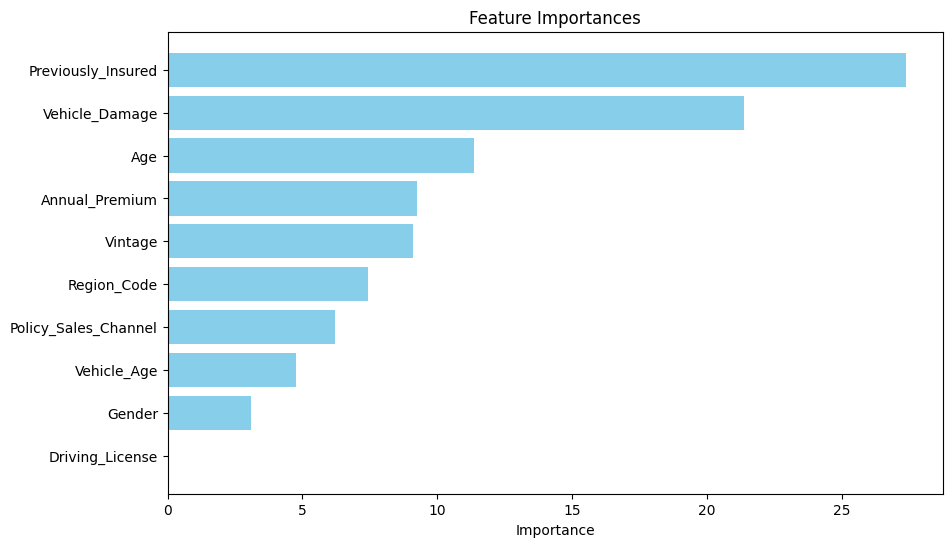

In [29]:
# Получение важности признаков
feature_importance = cb_clf.get_feature_importance()

# Создание DataFrame для удобства работы с данными
fi_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
fi_df = fi_df.sort_values(by='importance', ascending=True).reset_index(drop=True)

# Построение бар-плота
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')

plt.show()

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

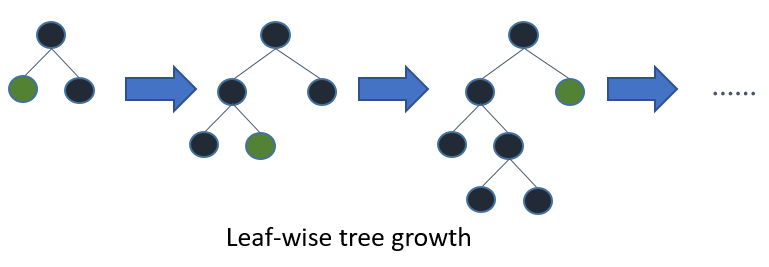

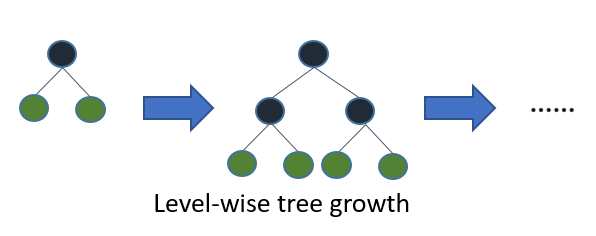

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [32]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score

params = {
    'lgbm__n_estimators': [100, 500, 1000, 2000],
    'lgbm__max_depth': [2, 3, 5, 100],
    'lgbm__learning_rate': [0.1, 0.01, 0.001]
}

LGBM_pipe = Pipeline([
    ("lgbm", LGBMClassifier(random_state=2))
])

search = GridSearchCV(LGBM_pipe,
                      params,
                      cv=5,
                      scoring='precision',
                      verbose=10)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

# Оценка качества лучшей модели на финальном тесте
best_model = search.best_estimator_
final_test_score = best_model.score(X_test, y_test)
print(f"Качество лучшей модели на финальном тесте: {final_test_score:.5f}")

# Оценка качества лучшей модели на тестовом наборе данных
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)

print(f"Precision на тестовом наборе данных: {precision:.5f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100
[CV 1/5; 1/48] END lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100;, score=0.000 total time=   0.0s
[CV 2/5; 1/48] START lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100
[CV 2/5; 1/48] END lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100;, score=0.000 total time=   0.0s
[CV 3/5; 1/48] START lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100
[CV 3/5; 1/48] END lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100;, score=0.000 total time=   0.0s
[CV 4/5; 1/48] START lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100
[CV 4/5; 1/48] END lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100;, score=0.000 total time=   0.0s
[CV 5/5; 1/48] START lgbm__learning_rate=0.1, lgbm__max_depth=2, lgbm__n_estimators=100
[CV 5/5; 1/48] END lgb

In [34]:
print(
    classification_report(
        y_test,
        best_model.predict(X_test)
    )
)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1770
           1       0.25      0.00      0.01       230

    accuracy                           0.88      2000
   macro avg       0.57      0.50      0.47      2000
weighted avg       0.81      0.88      0.83      2000

